<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$$$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\bold}[1]{\mathbf{#1}}
    \newcommand{\bolds}[1]{\boldoldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\boldegin{array}{#1}#2\end{array}\,\right]}
    $$$$
</div>

# COMPSCI 371 Homework 6

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: SVM Basics

In [1]:
import numpy as np

### Problem 1.1 (Exam Style if Done by Hand)

1.  
$$
\boldegin{aligned}
\boldar{w} &= \frac{\boldar{n}}{\mu^*} \\
\|\boldar{w}\| &= \frac{1}{\mu^*} \\
\mu^* &= \frac{1}{\|\boldar{w}\|} = \frac{1}{\sqrt{0.3^2 + 0.4^2}} = \frac{1}{0.5} = 2
\end{aligned}
$$  

2. ***Method 1:***
$$
\boldegin{aligned}
\Delta(\boldar{x}) &= \frac{\boldar{w} \cdot \boldar{x} + b}{\|\boldar{w}\|} = \mu^* = \frac{1}{\|\boldar{w}\|} \\
\boldar{w} \cdot \boldar{x} + b &= 1 \\
0.3x_1 + 0.4x_2 - 1.2 &= 1 \\
0.3x_1 + 0.4x_2 &= 2.2 \quad \text{(pos)}
\end{aligned}
$$  

$$
\boldegin{aligned}
\Delta(\boldar{x}) &= \frac{\boldar{w} \cdot \boldar{x} + b}{\|\boldar{w}\|} = -\mu^* = \frac{1}{\|\boldar{w}\|} \\
\boldar{w} \cdot \boldar{x} + b &= -1 \\
0.3x_1 + 0.4x_2 - 1.2 &= -1 \\
0.3x_1 + 0.4x_2 &= 0.2 \quad \text{(neg)}
\end{aligned}
$$  

***Method 2:***
$$
\boldegin{aligned}
\Delta(\boldar{x}) &= \boldar{x} \cdot \boldar{n} - \boldeta = \mu^* \\
\frac{\boldar{x} \cdot \boldar{w}}{\|\boldar{w}\|} + \frac{b}{\|\boldar{w}\|} &= \frac{1}{\|\boldar{w}\|} \\
\boldar{x} \cdot \boldar{w} + b &= 1
\end{aligned}
$$  

etc. same result as Method 1.

![figure-1.3](./figure-1.3.png)

### Problem 1.2 (Exam Style if Done by Hand)

In [2]:
Sx = [(0,0),(1,1),(2,0),(2,2),(2,3),(4,4)]
Sy = [-1,-1,1,-1,1,1]

def act(b, W, X):
    return np.dot(X,W) + b

def h(b, W, X):
    return 1 if act(b, W, X) >= 0 else -1

def margin(b, W, X, y):
    return act(b, W, X) / np.linalg.norm(W) * y

def hinge_loss_1(b, W, X, y):
    return np.max([0, 1 - y*act(b, W, X)])

# computed with second formula
def hinge_loss_2(b, W, X, y):
    ref_margin = 1 / np.linalg.norm(W)
    return 1 / ref_margin * np.max([0, ref_margin - margin(b, W, X, y)])

def zero_one_loss(b, W, X, y):
    return 0 if h(b, W, X) == y else 1

b, W = -1.2, np.array([0.3,0.4])

print('n', 'x_n', 'y_n', 'y_hat', 'act', 'mu_v', 'l_v', 'l_v', 'l_0-1', sep = '\t')

for n in range(len(Sx)):
    X = Sx[n]
    y = Sy[n]
    print(
        n, 
        X, 
        y, 
        h(b, W, X), 
        np.round(act(b, W, X),3), 
        np.round(margin(b, W, X, y),3), 
        np.round(hinge_loss_1(b, W, X, y),3),
        np.round(hinge_loss_2(b, W, X, y),3), 
        zero_one_loss(b, W, X, y)
    , sep = '\t')


n	x_n	y_n	y_hat	act	mu_v	l_v	l_v	l_0-1
0	(0, 0)	-1	-1	-1.2	2.4	0.0	0.0	0
1	(1, 1)	-1	-1	-0.5	1.0	0.5	0.5	0
2	(2, 0)	1	-1	-0.6	-1.2	1.6	1.6	1
3	(2, 2)	-1	1	0.2	-0.4	1.2	1.2	1
4	(2, 3)	1	1	0.6	1.2	0.4	0.4	0
5	(4, 4)	1	1	1.6	3.2	0.0	0.0	0


### Problem 1.3 (Exam Style)

1. margin mu_v >= 0
2. margin mu_v <= 0
3. hinge loss 0 <= l_v <= 1
4. hinge loss l_v >= 1
5. |mu_v| < mu_star. SV = {(1,1),(2,0),(2,2),(2,3)}

## Part 2: Feature Augmentation

In [3]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [4]:
def retrieve(file_name, semester='fall25', homework=6):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [5]:
file_name = 'data_3d.pkl'
retrieve(file_name)

Using previously downloaded file data_3d.pkl


In [6]:
with open(file_name, 'rb') as file:
    t = pickle.load(file)

### Problem 2.1

In [7]:
from itertools import combinations_with_replacement as combos
from sklearn.svm import LinearSVC

In [8]:
# d is the dimension of X and k is the maximum degree of the monomials
def monomial_powers(d, k):
    c = np.array(list(combos(range(d + 1), k)))
    m = np.zeros((c.shape[0], d))
    for j in range(d):
        m[:, j] = np.sum(c == j, axis=1)
    order = np.argsort(np.sum(m, axis=1))
    return m[order]

In [9]:
# do not change
def classifier():
    return LinearSVC(C=0.1, penalty='l1', max_iter=100000)

### Problem 2.2 (Exam Style)

$$L_S(b, \bold{w}) = \frac{1}{2} \| \bold{w} \|^2 + \frac{C_0}{N} \sum_{n=1}^N \ell_{(b, \bold{w})}(\bold{x}_n, y_n)$$

increase the value of C to increase the weighting of the summation term. 

this incentivizes the optimizer to reduce the magnitude of the total loss. 

so we can increase w and lower the reference margin increase the accuracy.

## Part 3: The Representer Theorem 

### Problem 3.1 (Exam Style)

### Problem 3.2 (Exam Style)

### Problem 3.3 (Exam Style)

### Problem 3.4 (Exam Style)

$$
L(b,w) = u^2 + v^2 + (b + uc + vd)^2 + (b + ue + vf)^2
$$

$$
\nabla_{w} L(b,w) =
\begin{bmatrix}
2u + 2(b + uc + vd)c + 2(b + ue + vf)e \\
2v + 2(b + uc + vd)d + 2(b + ue + vf)f
\end{bmatrix}

=

\begin{bmatrix}
0 \\ 0
\end{bmatrix}
$$

$$
\text{WTP: } w =
\begin{pmatrix}
u \\ v
\end{pmatrix}
= \alpha x_1 + \beta x_2 = \alpha
\begin{pmatrix}
c \\ d
\end{pmatrix}
+ \beta
\begin{pmatrix}
e \\ f
\end{pmatrix}
$$

$$
u = \alpha c + \beta e
$$
$$
v = \alpha d + \beta f
$$


$$
\text{Set:}
\begin{cases}
\alpha = - (b + uc + vd) \\
\beta = - (b + ue + vf)
\end{cases}
$$

$$
\therefore w = \alpha x_1 + \beta x_2
$$

### Problem 3.5

## Part 4: Gaussian Kernels 

In [10]:
from sklearn.svm import SVC

def rbf_svm():
    return SVC(kernel='rbf', C=1, gamma=1, tol=1.e-6)

In [11]:
file_name = 'mnist_parity_2d.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    mnist = pickle.load(file)

Using previously downloaded file mnist_parity_2d.pkl


### Problem 4.1

In [58]:
from sklearn.svm import SVC

def rbf_svm():
    return SVC(kernel='rbf', C=1, gamma=1, tol=1.e-6)

In [ ]:
import matplotlib.pyplot as plt

t = mnist['train']
s = mnist['test']
tx = t['x']
ty = t['y']
sx = s['x']
sy = s['y']

In [103]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_data_points(svm, x, y):
    disp = DecisionBoundaryDisplay.from_estimator(
        svm, x, 
        response_method="decision_function",
        plot_method="contour",
        colors = ["red","black","blue"],
        levels=[-1,0,1]
    )

    disp.ax_.scatter(x[:,0],x[:,1],c=np.array([-1,"blue","red"])[y])
    disp.ax_.set_aspect('equal')

svm = rbf_svm().fit(tx,ty)

sv_i = svm.support_
sv_x = tx[sv_i]
sv_y = ty[sv_i]

In [ ]:
print('training accuracy:', np.round(svm.score(tx, ty),3))
print('testing accuracy:', np.round(svm.score(sx, sy),3))

training accuracy: 0.946
testing accuracy: 0.941


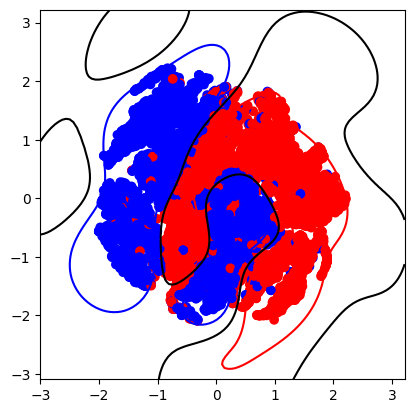

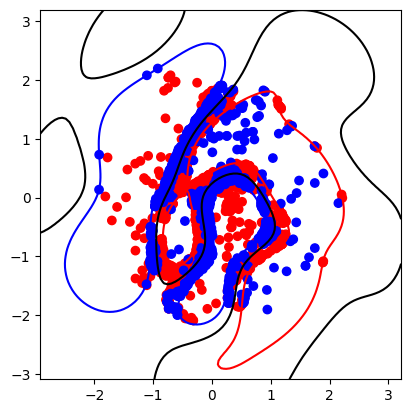

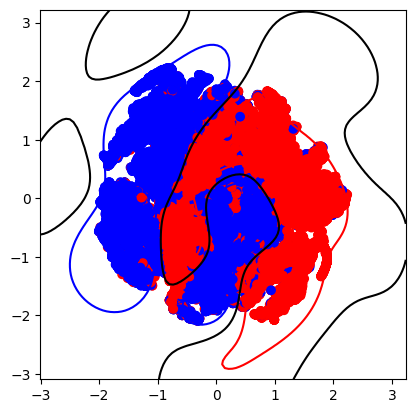

In [104]:
plot_data_points(svm, tx, ty)
plot_data_points(svm, sv_x, sv_y)
plot_data_points(svm, sx, sy)

### Problem 4.2 (Exam Style)

1.

blue points are 2d representations of odd imgs which are within the reference margin of the decision boundary.

some blue points appear on the blue ref margin, i.e. in left half, and are correctly classified

some blue points appear between the blue ref margin and decision boundary, i.e. in middle, and are correctly classified

some blue points are on the wrong side of the decision boundary, i.e. on right, and are incorrectly classified

2. 

yes, testing accuracy is approximately equal to training accuracy

training accuracy: 0.946
testing accuracy: 0.941

from figures, training and testing accuracy appear approximately equal. most points fall on correct side of boundary.

3.

increase